In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading dataset

In [3]:
df = pd.read_csv('spotifytoptracks.csv')
df.head()

,Unnamed: 0,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


We can see that the 1st column repeats Index, so we can get rid of it. To do so, we will first check the shape of the DataFrame and see the names of all its columns:

In [5]:
df.shape

(50, 17)

In [6]:
df.columns

Index(['Unnamed: 0', 'artist', 'album', 'track_name', 'track_id', 'energy',
       'danceability', 'key', 'loudness', 'acousticness', 'speechiness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'genre'],
      dtype='object')

The columns we are interested in deliting is named 'Unnamed: 0'. We will remove it, after it we will check the new shape and list of columns

In [8]:
del df['Unnamed: 0']

In [9]:
df.shape

(50, 16)

In [10]:
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'energy', 'danceability',
       'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre'],
      dtype='object')

## Data cleaning

### Handling missing values

The results below indicate that there are no missing values in DataFrame. Sum equal to 0 for each column means that boolean meaning for isna() for each position in a given column is False. 

In [14]:
df.isna().sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

### Removing duplicate samples and features

To remove duplicates of samples (rows) and features (columns), we will use 'duplicated()' function. By default, it checks rows, therefore, for columns we will transpose the data frame. 

In [17]:
duplicated_rows = df[df.duplicated()]

In [18]:
df_T = df.T
duplicated_cols = df_T[df_T.duplicated()].T

### Treating the outliers

The series of the below bar charts will help us to easier find anomalies (outliers) in numerical features.

<BarContainer object of 50 artists>

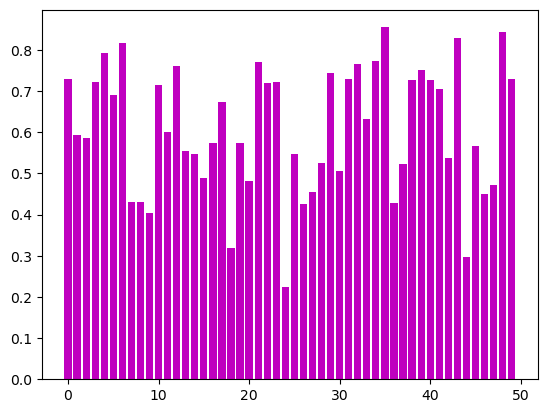

In [21]:
plt.bar(df.index, df['energy'], color='m')

No outliers in 'energy'

<BarContainer object of 50 artists>

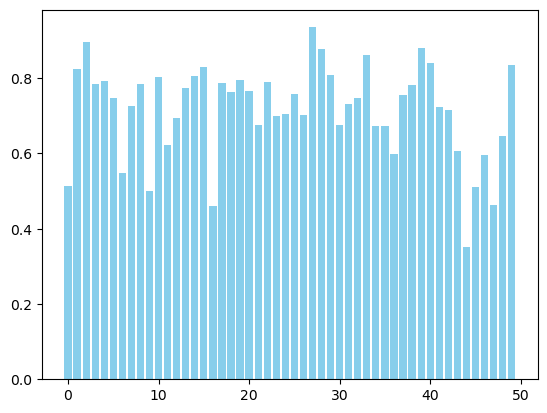

In [23]:
plt.bar(df.index, df['danceability'], color='skyblue')

No outliers in 'danceability'

<BarContainer object of 50 artists>

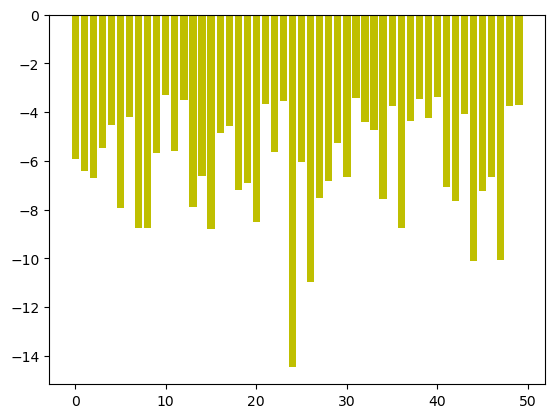

In [25]:
plt.bar(df.index, df['loudness'], color='y')

No outliers in 'loudness'

<BarContainer object of 50 artists>

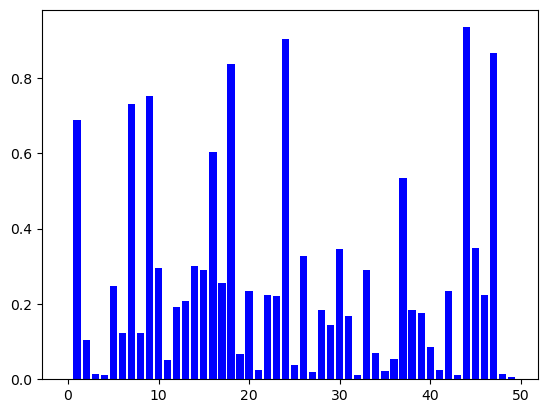

In [27]:
plt.bar(df.index, df['acousticness'], color='b')

No outliers in 'acousticness'

<BarContainer object of 50 artists>

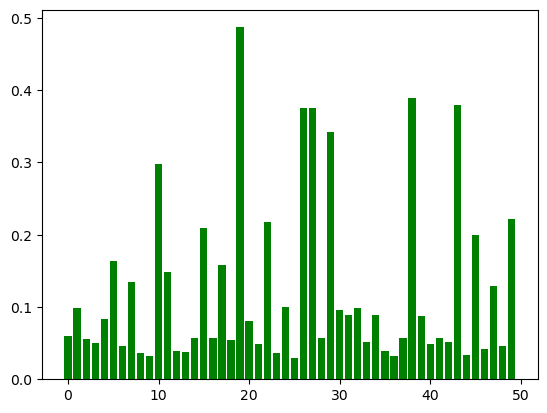

In [29]:
plt.bar(df.index, df['speechiness'], color='g')

No outliers in 'speechiness'

<BarContainer object of 50 artists>

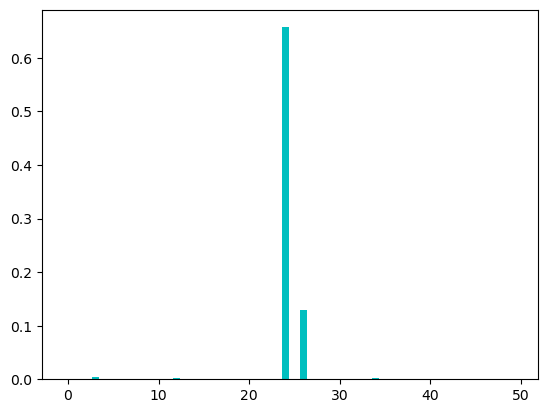

In [31]:
plt.bar(df.index, df['instrumentalness'], color='c')

On the bar chart for above (instrumentalness) we can see the outlier which makes the rest of the data is skewed. 
We will use 'zscore' function from stats to find the outlier. Then, by removing it and samples with 0-value, we can have better visualisation.

In [33]:
from scipy import stats
df['z_score'] = np.abs(stats.zscore(df['instrumentalness']))
outliers = df[df['z_score'] > 0.5] 
print(outliers[['track_name', 'instrumentalness']])

             track_name  instrumentalness
24  everything i wanted             0.657
26              bad guy             0.130


<BarContainer object of 16 artists>

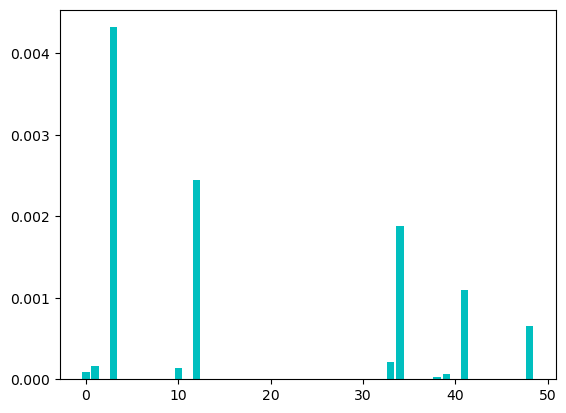

In [34]:
df_dropped = df.drop([24, 26]) 
df_dropped = df_dropped[df_dropped['instrumentalness'] != 0]
plt.bar(df_dropped.index, df_dropped['instrumentalness'], color='c')

<BarContainer object of 50 artists>

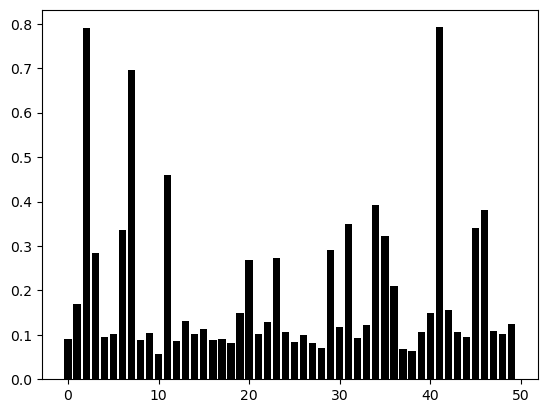

In [35]:
plt.bar(df.index, df['liveness'], color='k')

No outliers in 'liveness'

<BarContainer object of 50 artists>

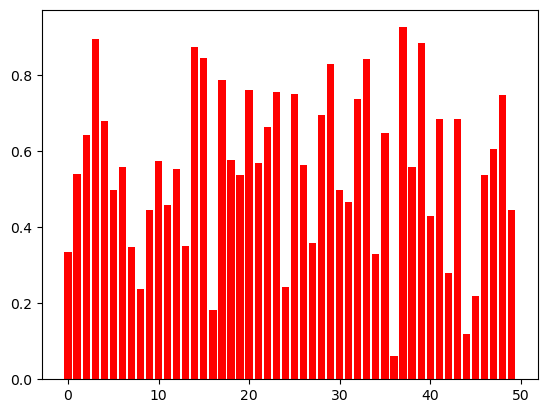

In [37]:
plt.bar(df.index, df['valence'], color='r')

No outliers in 'valence'

<BarContainer object of 50 artists>

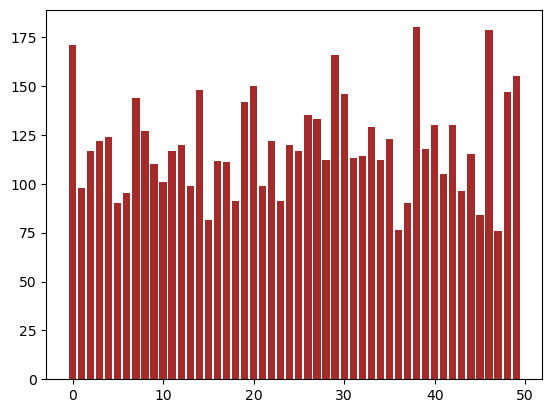

In [39]:
plt.bar(df.index, df['tempo'], color='brown')

No outliers in 'tempo'

<BarContainer object of 50 artists>

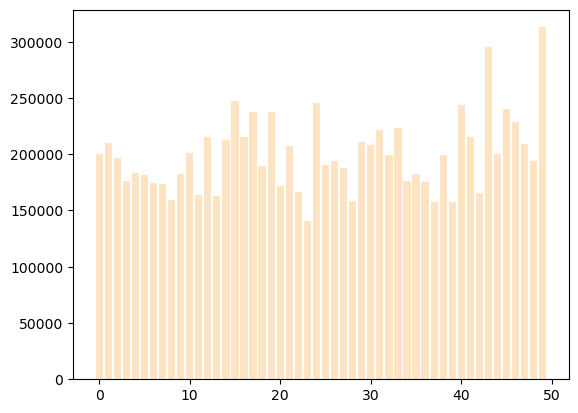

In [41]:
plt.bar(df.index, df['duration_ms'], color='bisque')

No outliers in 'duration_ms'

## EDA

### How many observations are there in this dataset?
### How many features this dataset has?

These two questions can be answered by obtaining the shape of the DataFrame. Rows stand for observations, columns stand for features.

In [46]:
df.shape

(50, 17)

In [47]:
df.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre,z_score
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul,0.169943
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie,0.169241
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap,0.170965
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic,0.124694
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco,0.170965


### Which of the features are categorical?
### Which of the features are numeric?

These two questions can be answered by using 'dtypes' on the data frame. We will receive data tyoe for each row. Everything apart from 'object' type is numeric. Categorical otherwise. We will apply boolean condition on the data_types series, collect indexes for positively resulted objects and convert the results into lists. 

In [50]:
data_types = df.dtypes
numerical_features = data_types[data_types != 'object'].index.tolist()
categorical_features = data_types[data_types == 'object'].index.tolist()
print('Numerical features: ', numerical_features)
print('Categorical features: ', categorical_features)

Numerical features:  ['energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'z_score']
Categorical features:  ['artist', 'album', 'track_name', 'track_id', 'genre']


### Are there any artists that have more than 1 popular track? If yes, which and how many?
### Who was the most popular artist?

We will answer both questions displaying all artists with more than one track. Since it will be arranged in descending order, the top positions will be the most popular artists.

In [53]:
value_counts = df['artist'].value_counts()
value_counts[value_counts > 1]

artist
Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Name: count, dtype: int64

### How many artists in total have their songs in the top 50?

Using unique() function to get the list of the unique artists' names and then checking its size.

In [56]:
df['artist'].unique().size

40

### Are there any albums that have more than 1 popular track? If yes, which and how many?

Here we apply the same principle as in the question about the most popular artists with more than one track.

In [59]:
value_counts = df['album'].value_counts()
value_counts[value_counts > 1]

album
Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Name: count, dtype: int64

### How many albums in total have their songs in the top 50?

Using unique() function to get the list of the unique albums' names and then checking its size.

In [62]:
df['album'].unique().size

45

### Which tracks have a danceability score above 0.7?

Using boolean mask to filter the results on the danceability criteria and then displaying culumns we are inetersted in for positively responding items

In [65]:
high_danceability = df[df['danceability'] > 0.7]
high_danceability[['track_name', 'danceability']]

,track_name,danceability
1,Dance Monkey,0.825
2,The Box,0.896
3,Roses - Imanbek Remix,0.785
4,Don't Start Now,0.793
5,ROCKSTAR (feat. Roddy Ricch),0.746
7,death bed (coffee for your head),0.726
8,Falling,0.784
10,Tusa,0.803
13,Blueberry Faygo,0.774
14,Intentions (feat. Quavo),0.806


### Which tracks have a danceability score below 0.4?

Here we use the same tactics as above receiving only one result corresponding to our criteria.

In [68]:
low_danceability = df[df['danceability'] < 0.4]
low_danceability[['track_name', 'danceability']]

,track_name,danceability
44,lovely (with Khalid),0.351


### Which tracks have their loudness above -5?

Same code but for 'loudness'. The lower the negative value is, the louder is the track. 

In [71]:
loud_tracks = df[df['loudness'] > -5]
loud_tracks[['track_name', 'loudness']]

,track_name,loudness
4,Don't Start Now,-4.521
6,Watermelon Sugar,-4.209
10,Tusa,-3.280
12,Circles,-3.497
16,Before You Go,-4.858
17,Say So,-4.577
21,Adore You,-3.675
23,Mood (feat. iann dior),-3.558
31,Break My Heart,-3.434
32,Dynamite,-4.410


### Which tracks have their loudness below -8?

In [73]:
silent_tracks = df[df['loudness'] < -8]
silent_tracks[['track_name', 'loudness']]

,track_name,loudness
7,death bed (coffee for your head),-8.765
8,Falling,-8.756
15,Toosie Slide,-8.820
20,Savage Love (Laxed - Siren Beat),-8.520
24,everything i wanted,-14.454
26,bad guy,-10.965
36,HIGHEST IN THE ROOM,-8.764
44,lovely (with Khalid),-10.109
47,If the World Was Ending - feat. Julia Michaels,-10.086


### Which track is the longest?

Here we use idxmax() to receive the index of the sample with the highest and lowest (below) duration criteria. Then provide this index to the loc to display the result. We can select feautures we would like to display in the result.

In [76]:
max_duration_index = df['duration_ms'].idxmax()
df.loc[max_duration_index][['track_name', 'artist', 'duration_ms']]


track_name       SICKO MODE
artist         Travis Scott
duration_ms          312820
Name: 49, dtype: object

### Which track is the shortest?

In [78]:
min_duration_index = df['duration_ms'].idxmin()
df.loc[min_duration_index][['track_name', 'artist', 'duration_ms']]

track_name     Mood (feat. iann dior)
artist                       24kGoldn
duration_ms                    140526
Name: 23, dtype: object

### Which genre is the most popular?

We will first create Series with genres names and number of times it was present in the data frame. Then we will display the index of the position with the highest value of times. 

In [81]:
genre_counts = df['genre'].value_counts()
most_popular_genre = genre_counts.idxmax()
most_popular_genre

'Pop'

### Which genres have just one song on the top 50?

Here, after creating the Series, we will select positions with value (number of counts) equals to 1.

In [84]:
genre_counts = df['genre'].value_counts()
genre_counts[genre_counts == 1]

genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

### How many genres in total are represented in the top 50?

In [86]:
df['genre'].unique().size

16

### Which features are strongly positively correlated?

In [88]:
# dropping z-score col created before for another task and selecting numerical features to perform correlation on

In [89]:
df = df.drop('z_score', axis=1)
types = df.dtypes
numerical = types[types != 'object'].index.tolist()
numerical

['energy',
 'danceability',
 'key',
 'loudness',
 'acousticness',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms']

We first create correlation matrix for all numeric values of the data frame and then, based on set treshold, find the ones with strong positive and strong negative correlation as well as the ones with no significant correlation. 

In [91]:
corr_matrix = df[numerical].corr()
corr_matrix

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.062428,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.285036,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
key,0.062428,0.285036,1.000000,-0.009178,-0.113394,-0.094965,0.020802,0.278672,0.120007,0.080475,-0.003345
loudness,0.791640,0.167147,-0.009178,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.113394,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.094965,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,0.020802,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,0.278672,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.120007,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.080475,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328


We set threshold at 0.7 and then from previously created correlation matrix select items with values more than the threshold and non-1 values.

In [93]:
threshold = 0.7
strong_pos_corr = corr_matrix[(corr_matrix > threshold) & (corr_matrix != 1)]
strong_pos_corr.dropna(how='all').dropna(how='all', axis=1)

,energy,loudness
energy,NaN,0.79164
loudness,0.79164,NaN


There is strong positive correlation between energy and loudness. The higher/lower is one of the parameters, the higher/lower is the other. The louder track is more energetic.

### Which features are strongly negatively correlated?

Applying the same principle with threshold -0.6 for strong negative correlation.

In [97]:
treshold = -0.6
strong_neg_corr = corr_matrix[(corr_matrix < treshold) & (corr_matrix != 1)]
strong_neg_corr.dropna(how='all').dropna(how='all', axis=1)

,energy,acousticness
energy,NaN,-0.682479
acousticness,-0.682479,NaN


There is strong negative correlation between energy and loudness. The higher is one of the parameters, the lower is the other and vice versa (the more acoustic track is, the less energetic it is).

### Which features are not correlated?

Answering this question, we can see that most of the features are not significanly corelated (positively or negatively).

In [101]:
treshold = 0.1
no_corr = corr_matrix[(corr_matrix < treshold) & (treshold > -treshold) & (treshold != 1)]
no_corr.dropna(how='all').dropna(how='all', axis=1)

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,NaN,NaN,0.062428,NaN,-0.682479,0.074267,-0.385515,0.069487,NaN,0.075191,0.081971
danceability,NaN,NaN,NaN,NaN,-0.359135,NaN,-0.017706,-0.006648,NaN,NaN,-0.033763
key,0.062428,NaN,NaN,-0.009178,-0.113394,-0.094965,0.020802,NaN,NaN,0.080475,-0.003345
loudness,NaN,NaN,-0.009178,NaN,-0.498695,-0.021693,-0.553735,-0.069939,NaN,NaN,0.064130
acousticness,-0.682479,-0.359135,-0.113394,-0.498695,NaN,-0.135392,NaN,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,NaN,-0.094965,-0.021693,-0.135392,NaN,0.028948,-0.142957,0.053867,NaN,NaN
instrumentalness,-0.385515,-0.017706,0.020802,-0.553735,NaN,0.028948,NaN,-0.087034,-0.203283,0.018853,NaN
liveness,0.069487,-0.006648,NaN,-0.069939,-0.128384,-0.142957,-0.087034,NaN,-0.033366,0.025457,-0.090188
valence,NaN,NaN,NaN,NaN,-0.243192,0.053867,-0.203283,-0.033366,NaN,0.045089,-0.039794
tempo,0.075191,NaN,0.080475,NaN,-0.241119,NaN,0.018853,0.025457,0.045089,NaN,NaN


## How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

For answering the next three questions, we will group data frame by genre, selecting 'danceability', 'loudness', 'acousticness' as the second feature for the 1st, 2nd, and 3rd questions, respectively. For each of these parameters we can use mean() function to assess average value for each genre. 
After this, we will select genres we are inetrested in (which will be indexes now, after grouping). 

In [104]:
danceability = df[['genre', 'danceability']].groupby('genre').mean()
danceability.loc[['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']]

,danceability
genre,
Pop,0.677571
Hip-Hop/Rap,0.765538
Dance/Electronic,0.755000
Alternative/Indie,0.661750


## How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [106]:
loudness = df[['genre', 'loudness']].groupby('genre').mean()
loudness.loc[['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']]

,loudness
genre,
Pop,-6.460357
Hip-Hop/Rap,-6.917846
Dance/Electronic,-5.338000
Alternative/Indie,-5.421000


## How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [108]:
acousticness = df[['genre', 'acousticness']].groupby('genre').mean()
acousticness.loc[['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']]

,acousticness
genre,
Pop,0.323843
Hip-Hop/Rap,0.188741
Dance/Electronic,0.099440
Alternative/Indie,0.583500


Here we only check 4 genres. For bigger number of genres, it would be also useful to make graphical representation of the results to make them more readable. 